In [1]:
from linares_plot import *
import scipy.io as io
import pickle


In [2]:
import os
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\distractor_neurons\\Christos_first_second\\brian_simulations'

In [36]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulation_30000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

In [37]:
# data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulation_10000.mat') #,{'rate':rates, 'spktm': spikes.it})
# spikes = data['spktm']

In [38]:
spikes[1] ## todos los tiempos donde ha habido un spike
spikes[0] ## la neurona correspondiente que ha hecho el spike

array([  229.,   275.,   419., ..., 10082., 16627.,  9301.])

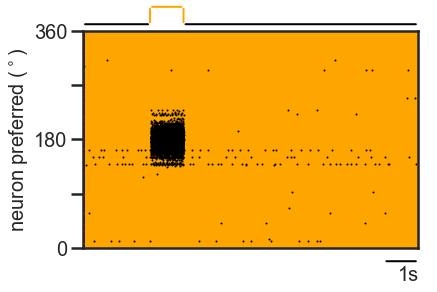

In [39]:
N0 = 30000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);


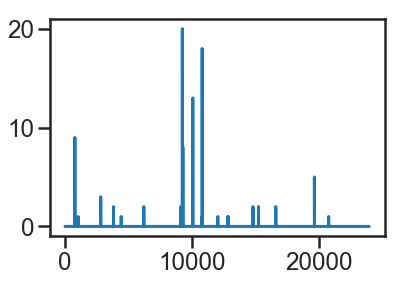

In [40]:
### Rate de todas las neuronas durante el delay
plt.plot(data['rate'][0])

In [62]:
## aquí tienes los spiketimes da cada una d elas neuronas

dict_spiketimes = pickle.load( open( "C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\dict_spiketimes.pkl", "rb" ), 
                              encoding='latin1' )

dict_spiketimes

### Multiple simulations (paralel)

In [51]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulations.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes_all = data['spktm']

### Just plot the first
n_sim=0 #0,1,2,....
spikes = [spikes_all[n_sim][0][0], spikes_all[n_sim][1][0]]

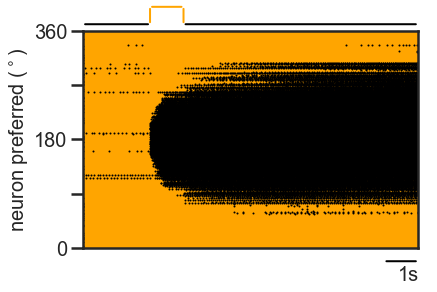

In [52]:
N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);


## Plot single simulation

In [49]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_ext5.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

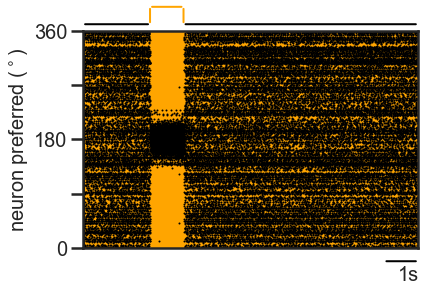

In [50]:
N0 = 30000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

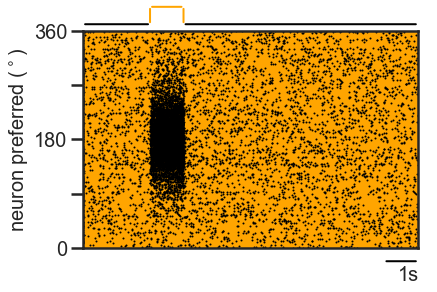

In [28]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_30000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 30000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

#### Results 20 simulations N=1000

In [7]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulations_1000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes_all = data['spktm']

### Just plot the first
n_sim=-10 #0,1,2,....
spikes = [spikes_all[n_sim][0][0], spikes_all[n_sim][1][0]]

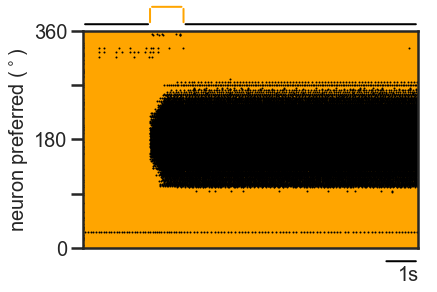

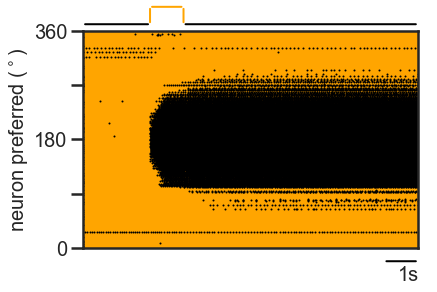

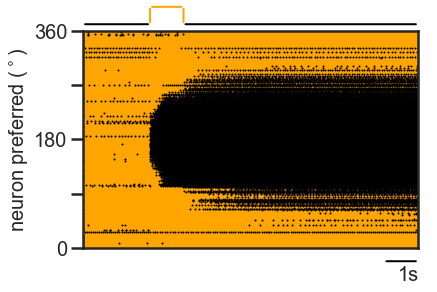

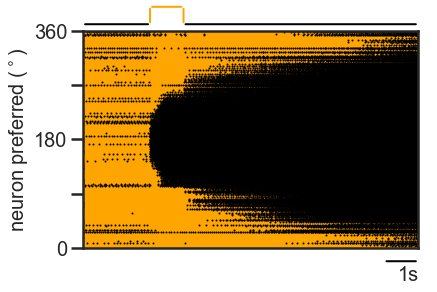

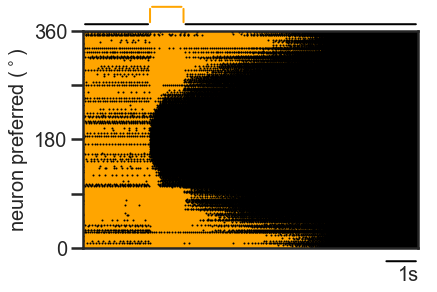

In [11]:

for n_sim in [0,5,10,15,19]:
    spikes = [spikes_all[n_sim][0][0], spikes_all[n_sim][1][0]]
    N0 = 1000
    time_s =10
    N=0.8*N0 #(el 80% son excitadoras)
    stim_on=2
    stim_off=3


    stim_on/time_s

    fig, ax = plt.subplots()
    ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
    ax.set_facecolor("orange")
    plt.xlim(0,time_s)
    plt.ylim(0,N)

    # ax = fig.add_subplot(1, 1, 1)
    inf=1.03
    sup=1.11
    ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
    ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
    ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
    ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

    ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
    plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])

    plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.show()

In [ ]:
### 90 y 270

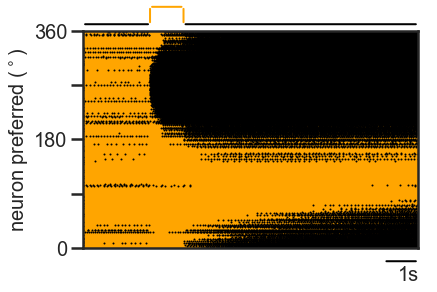

In [25]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_90deg.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

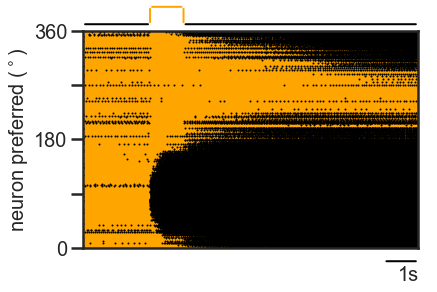

In [26]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_270deg.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

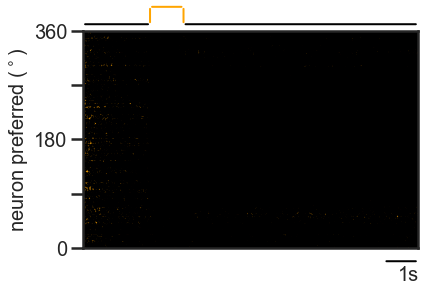

In [29]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_20000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 20000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

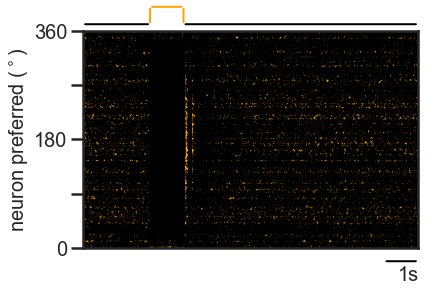

In [34]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation2_20000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 20000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

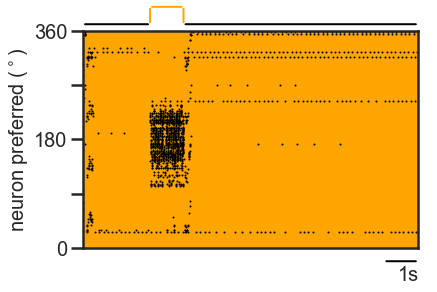

In [35]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_1000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

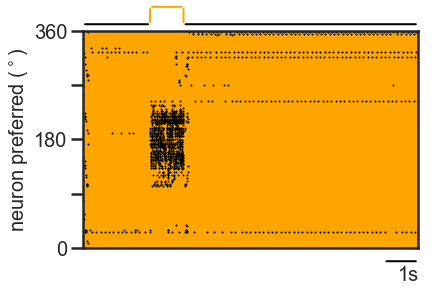

In [13]:
%matplotlib inline

data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_1000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

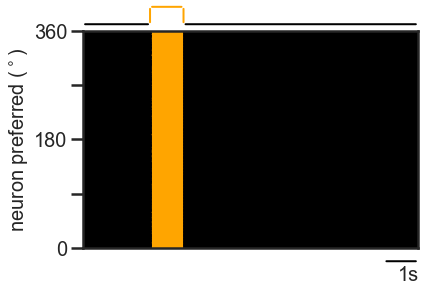

In [47]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

In [46]:
### Compute the tuning?

In [40]:
1000/25

40.0

In [41]:
20*70/80

17.5

IndexError: index 1 is out of bounds for axis 0 with size 0

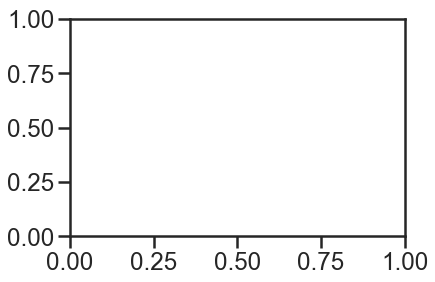

In [3]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 80000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

IndexError: index 1 is out of bounds for axis 0 with size 0

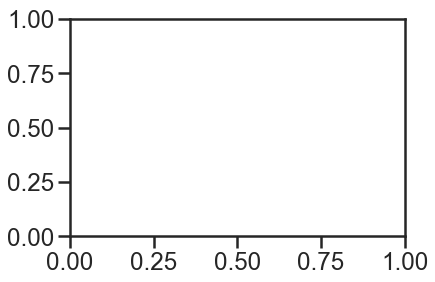

In [4]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\m1single_simulation.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation


<IPython.core.display.Javascript object>


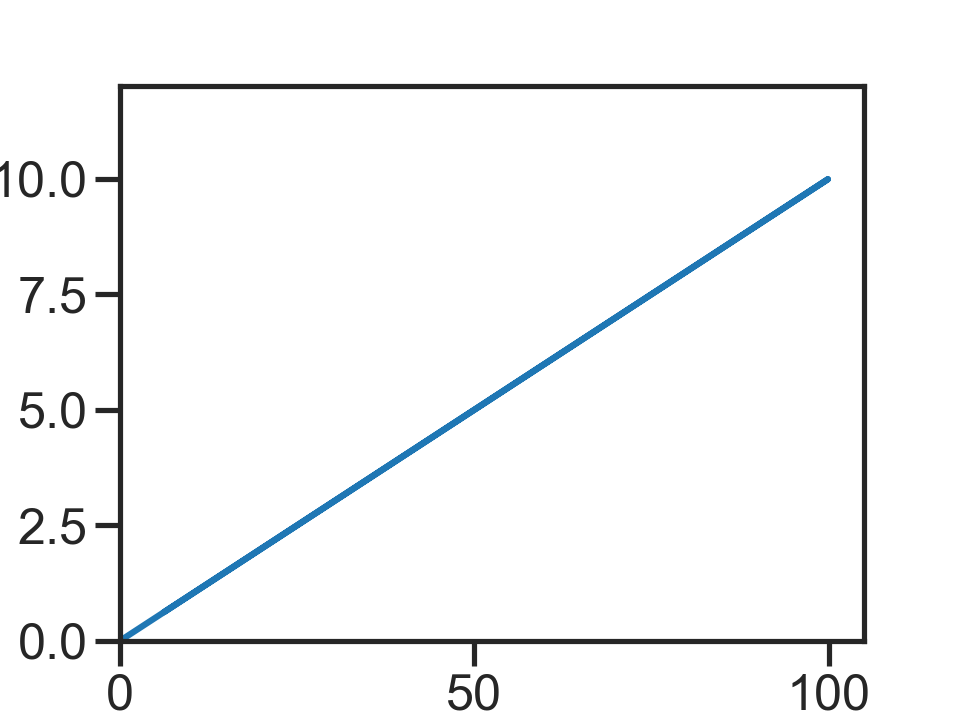

In [11]:
x_data=[]
y_data=[]

fig, ax = plt.subplots()
ax.set_xlim(0,105)
ax.set_ylim(0,12)
line, =ax.plot(0,0)


def animation_fr(i):
    x_data.append(i*10)
    y_data.append(i)
    #
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line,

#

animation=FuncAnimation(fig, func=animation_fr, frames=np.arange(0,10, 0.01), interval=10)
plt.show()

<IPython.core.display.Javascript object>


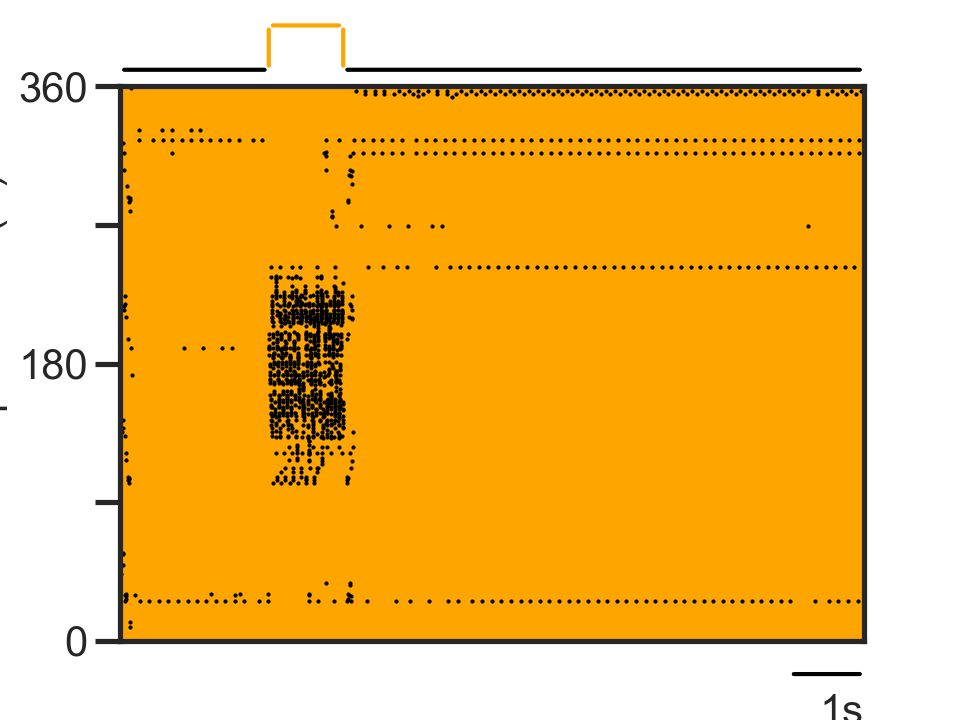

In [15]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_1000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

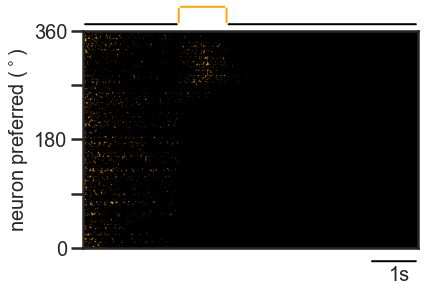

In [18]:
%matplotlib inline

data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_balancedRing_hansel.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']


N0 = 20000
time_s =7
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

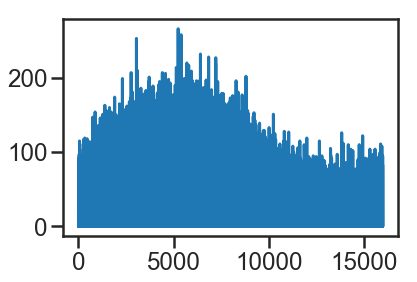

In [24]:
plt.plot(rates[0])

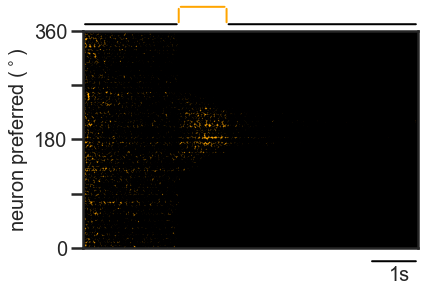

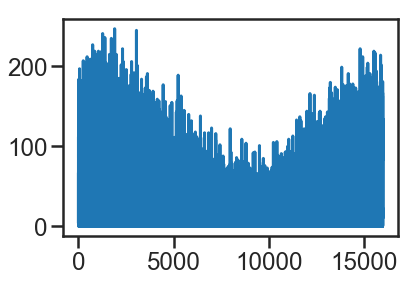

In [26]:
%matplotlib inline

data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_balancedRing_hansel2.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']
rates= data['rate']


N0 = 20000
time_s =7
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

plt.show()

plt.plot(rates[0])

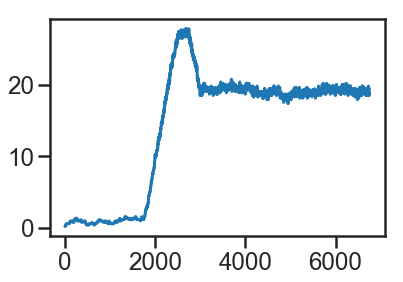

In [47]:
fr1 = np.loadtxt('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\output_fr1.txt', dtype=str, delimiter=';')
fr1 = fr1[2][2:-1].split(',')
fr1 = [round(float(x),2) for x in fr1]
plt.plot(fr1)

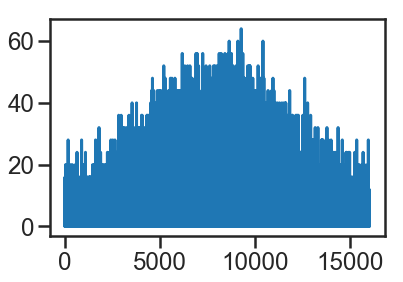

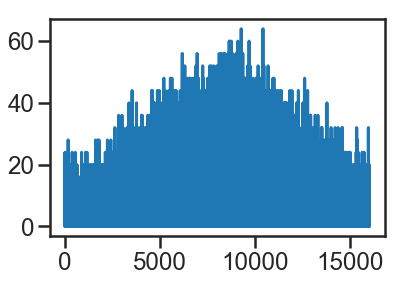

In [105]:
bump1 = np.loadtxt('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\output_bump1.txt', dtype=str, delimiter=';')
bump1 = bump1[2][2:-1].split(',') ##1sec
bump1 = [round(float(x),2) for x in bump1]
plt.plot(bump1)
plt.show()

bump1 = np.loadtxt('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\output_bump1.txt', dtype=str, delimiter=';')
bump1 = bump1[3][2:-1].split(',') ##delay
bump1 = [round(float(x),2) for x in bump1]
plt.plot(bump1)
plt.show()

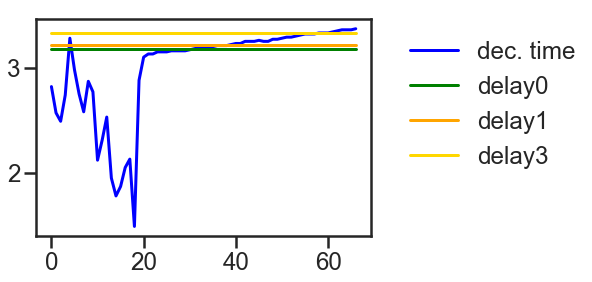

In [80]:
beh1 = np.loadtxt('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\output_beh1.txt', dtype=str, delimiter=';')
dec_time= beh1[5][2:-1].split(',')
dec_time = [round(float(x),2) for x in dec_time]
plt.plot(dec_time, color='blue', label='dec. time')

beh1 = np.loadtxt('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\output_beh1.txt', dtype=str, delimiter=';')
delay0_dec = round(float(beh1[2]),2)
delay1_dec = round(float(beh1[3]),2)
delay3_dec = round(float(beh1[4]),2)
plt.plot(range(len(dec_time)), np.array([delay0_dec for i in range(len(dec_time))]), color='green', label='delay0' )
plt.plot(range(len(dec_time)), np.array([delay1_dec for i in range(len(dec_time))]), color='orange', label='delay1' )
plt.plot(range(len(dec_time)), np.array([delay3_dec for i in range(len(dec_time))]), color='gold', label='delay3' )
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1))
